In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weatherAUS.csv" , usecols=["Date","Location","Rainfall"])

In [3]:
df.head(10)

,Date,Location,Rainfall
0,2008-12-01,Albury,0.6
1,2008-12-02,Albury,0.0
2,2008-12-03,Albury,0.0
3,2008-12-04,Albury,0.0
4,2008-12-05,Albury,1.0
5,2008-12-06,Albury,0.2
6,2008-12-07,Albury,0.0
7,2008-12-08,Albury,0.0
8,2008-12-09,Albury,0.0
9,2008-12-10,Albury,1.4


In [4]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
df.columns

Index(['Date', 'Location', 'Rainfall'], dtype='object')

In [6]:
df["Rainfall"].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date        datetime64[ns]
Location            object
Rainfall           float64
dtype: object

In [8]:
df["Year"] = df["Date"].dt.year

Decido quedarme con las fechas 2009-2016

In [9]:
df = df[2009 <= df["Year"]]
df = df[2017 > df["Year"]]

In [10]:
dfBrisbaneF = df["Location"] == 'Brisbane'
dfBrisbane = df[dfBrisbaneF]
dfBrisbane

,Date,Location,Rainfall,Year
84191,2009-01-01,Brisbane,0.0,2009
84192,2009-01-02,Brisbane,0.0,2009
84193,2009-01-03,Brisbane,4.4,2009
84194,2009-01-04,Brisbane,4.8,2009
84195,2009-01-05,Brisbane,0.0,2009
...,...,...,...,...
87019,2016-12-27,Brisbane,1.4,2016
87020,2016-12-28,Brisbane,0.2,2016
87021,2016-12-29,Brisbane,0.0,2016
87022,2016-12-30,Brisbane,0.0,2016


Reseteo indices

In [11]:
dfBrisbane = dfBrisbane.reset_index()
del dfBrisbane["index"]
dfBrisbane

,Date,Location,Rainfall,Year
0,2009-01-01,Brisbane,0.0,2009
1,2009-01-02,Brisbane,0.0,2009
2,2009-01-03,Brisbane,4.4,2009
3,2009-01-04,Brisbane,4.8,2009
4,2009-01-05,Brisbane,0.0,2009
...,...,...,...,...
2828,2016-12-27,Brisbane,1.4,2016
2829,2016-12-28,Brisbane,0.2,2016
2830,2016-12-29,Brisbane,0.0,2016
2831,2016-12-30,Brisbane,0.0,2016


Elimino Brisbane del df original

In [12]:
dfS = df.set_index("Location")
dfRestoAustralia = dfS.drop("Brisbane", axis=0)


In [13]:
dfRestoAustralia = dfRestoAustralia.reset_index(level=0)

In [14]:

print((dfRestoAustralia["Location"] == "Brisbane").any())
dfRestoAustralia

False


,Location,Date,Rainfall,Year
0,Albury,2009-01-01,0.0,2009
1,Albury,2009-01-02,0.0,2009
2,Albury,2009-01-03,0.0,2009
3,Albury,2009-01-04,0.0,2009
4,Albury,2009-01-05,0.0,2009
...,...,...,...,...
131668,Uluru,2016-12-27,63.8,2016
131669,Uluru,2016-12-28,0.0,2016
131670,Uluru,2016-12-29,0.0,2016
131671,Uluru,2016-12-30,0.0,2016


In [15]:
def km2Brisbane(x):
    return x/15826 # lluvia por km2 en brisbane (mm/km2)

def km2RestoAustralia(x):
    return x/7582994 # lluvia por km2 en (australia - brisbane)

In [16]:
dfBrisbaneG = dfBrisbane.groupby("Year").agg({"Rainfall":'sum'})
dfBrisbaneG["Rainfall"] = dfBrisbaneG["Rainfall"].apply(lambda x: km2Brisbane(x))
dfBrisbaneG

,Rainfall
Year,
2009,0.067762
2010,0.104802
2011,0.067951
2012,0.071174
2013,0.053734
2014,0.049930
2015,0.091331
2016,0.047997


In [17]:
dfRestoG = dfRestoAustralia.groupby("Year").agg({"Rainfall":'sum'})
dfRestoG["Rainfall"] = dfRestoG["Rainfall"].apply(lambda x: km2RestoAustralia(x))

dfRestoG

,Rainfall
Year,
2009,0.004599
2010,0.005652
2011,0.005501
2012,0.004645
2013,0.004712
2014,0.004407
2015,0.004720
2016,0.005405


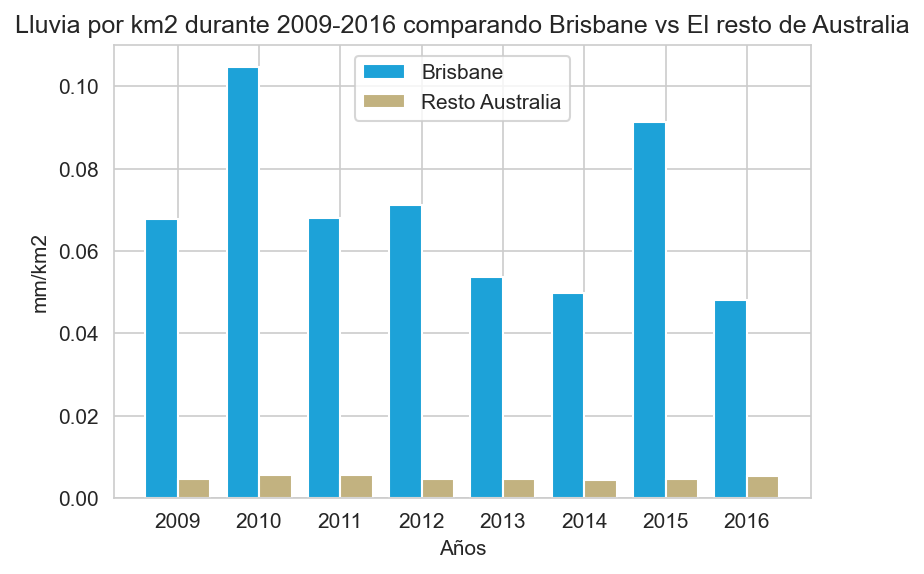

In [18]:
sns.set_style("whitegrid")
plt.figure(dpi=150)
plt.bar(x= dfBrisbane["Year"].unique() - 0.2, height=dfBrisbaneG["Rainfall"],width = 0.4, color="#1da2d8", label="Brisbane")
plt.bar(x=dfRestoAustralia["Year"].unique() + 0.2, height=dfRestoG["Rainfall"],width = 0.4, color= "#c2b280", label="Resto Australia")

plt.title("Lluvia por km2 durante 2009-2016 comparando Brisbane vs El resto de Australia")
plt.xlabel("Años")
plt.ylabel("mm/km2")
plt.legend(loc=9)